In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

In [3]:
columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring",
    "stalk-surface-below-ring", "stalk-color-above-ring",
    "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color",
    "population", "habitat"
]

In [4]:
df = pd.read_csv(url, header=None, names=columns)

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
mushrooms = df[["class", "odor", "cap-color"]]

In [7]:
mushrooms = mushrooms.rename(columns={
    "class": "edibility",
    "odor": "odor",
    "cap-color": "cap_color"
})

mushrooms.head()

,edibility,odor,cap_color
0,p,p,n
1,e,a,y
2,e,l,w
3,p,p,w
4,e,n,g


In [17]:
mushrooms = df[["class", "odor", "cap-color"]]
mushrooms = mushrooms.rename(columns={
    "class": "edibility",
    "odor": "odor",
    "cap-color": "cap_color"
})

for col in ['edibility', 'odor', 'cap_color']:
    mushrooms[col] = pd.factorize(mushrooms[col])[0]

mushrooms.head()

,edibility,odor,cap_color
0,0,0,0
1,1,1,1
2,1,2,2
3,0,0,2
4,1,3,3


In [19]:
print("Edibility Value Counts:")
print(mushrooms['edibility'].value_counts())

Edibility Value Counts:
edibility
1    4208
0    3916
Name: count, dtype: int64


4208 are posisonous and 3916 are edible.

In [20]:
print("\nOdor Value Counts:")
print(mushrooms['odor'].value_counts())


Odor Value Counts:
odor
3    3528
4    2160
7     576
6     576
1     400
2     400
0     256
5     192
8      36
Name: count, dtype: int64


The highest odor is 3 (None) at 3528

In [21]:
print("\nCap Color Value Counts:")
print(mushrooms['cap_color'].value_counts())


Cap Color Value Counts:
cap_color
0    2284
3    1840
4    1500
1    1072
2    1040
6     168
5     144
8      44
7      16
9      16
Name: count, dtype: int64


Most common cap color is brown

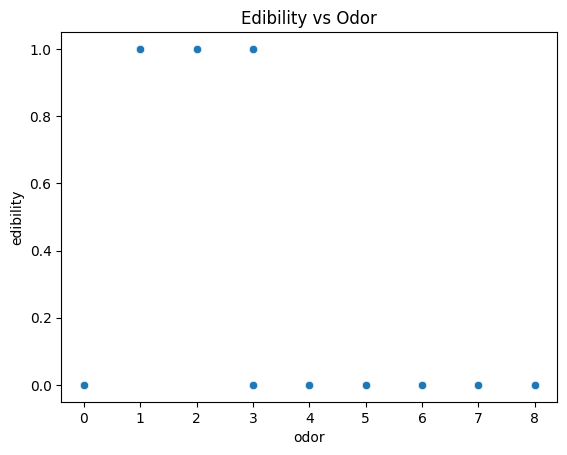

In [22]:
sns.scatterplot(data=mushrooms, x="odor", y="edibility")
plt.title("Edibility vs Odor")
plt.show()

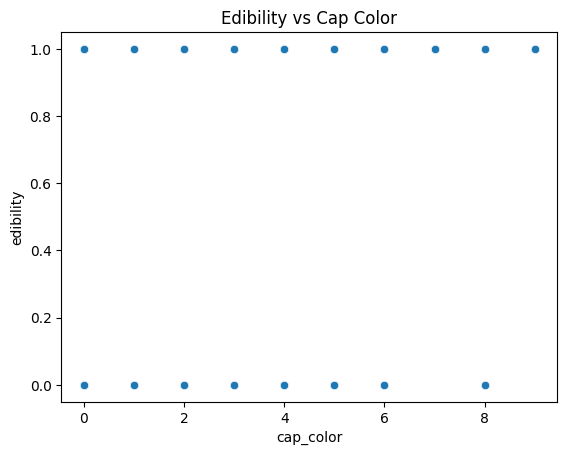

In [23]:
sns.scatterplot(data=mushrooms, x="cap_color", y="edibility")
plt.title("Edibility vs Cap Color")
plt.show()

Overall odor is a good indicator of whether a mushroom is edible or poisonous but "no odor" is not a good indicator. Addtionally cap color does not seem strong in predicting if the mushroom is edible.